## Задача 

Обучите модель на тренировочных данных, предскажите авторов для тестовых и поместите в переменную predictions. Затем посчитайте precision score на предсказаниях и y_test, укажите параметр average='micro', и сохраните результат в переменную precision.

Если он будет недостаточно высок, потюньте немного модель.

In [67]:
import pandas as pd
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [28]:
df=pd.read_csv('https://stepik.org/media/attachments/course/4852/songs.csv')

In [29]:
df.head(5)

,song,year,artist,genre,lyrics,length,commas,exclamations,colons,hyphens
0,the-ownerz,2007,gangstarr,Hip-Hop,"""One-two..""\n""One-two, shots to the chin.. kno...",1300,24,5,0,11
1,dead-sound-of-misery,2006,blind-guardian,Metal,It's dark\nLet's do it now\nBring in the siren...,1566,0,0,0,0
2,modred-s-song,2006,blind-guardian,Metal,I've lost my battle before it starts\nmy first...,996,1,0,1,0
3,the-ninth-wave,2015,blind-guardian,Metal,As dark night embraces\nWe are the nation\nI w...,2868,5,0,0,0
4,skills,2014,gangstarr,Hip-Hop,"Skills, skills, skills\n""My Microphone""\n""It's...",3351,22,0,0,3


In [30]:
X=df.drop(['year','genre','lyrics','artist'], axis=1)

In [31]:
y=df.artist

In [32]:
y

0           gangstarr
1      blind-guardian
2      blind-guardian
3      blind-guardian
4           gangstarr
            ...      
355              abba
356              abba
357              abba
358         gangstarr
359              abba
Name: artist, Length: 360, dtype: object

In [27]:
X.isnull().sum()

song            0
year            0
genre           0
length          0
commas          0
exclamations    0
colons          0
hyphens         0
dtype: int64

In [33]:
X.shape

(360, 6)

In [34]:
y.shape

(360,)

In [54]:
X = pd.get_dummies(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
clf = DecisionTreeClassifier(criterion='entropy',max_depth=10000000)

In [46]:
y_train

250              abba
312              abba
341         gangstarr
284    blind-guardian
21               abba
            ...      
323              abba
192    blind-guardian
117    blind-guardian
47               abba
172              abba
Name: artist, Length: 288, dtype: object

In [59]:
X_train

,length,commas,exclamations,colons,hyphens,song_2-deep,song_2-steps-ahead,song_a-dark-passage,song_above-the-clouds,song_age-of-false-innocence,...,song_who-got-gunz,song_who-s-gonna-take-the-weight,song_why-did-it-have-to-be-me,song_wizard-s-crown,song_words-from-the-nutcracker,song_work,song_you-know-my-steez,song_you-owe-me-one,song_you-re-the-voice,song_zonin
250,1588,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
312,1338,22,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
341,3351,22,0,0,3,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
284,1576,9,0,6,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21,232,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,833,4,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
192,1364,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
117,1406,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
47,1134,23,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
clf=clf.fit(X_train,y_train)

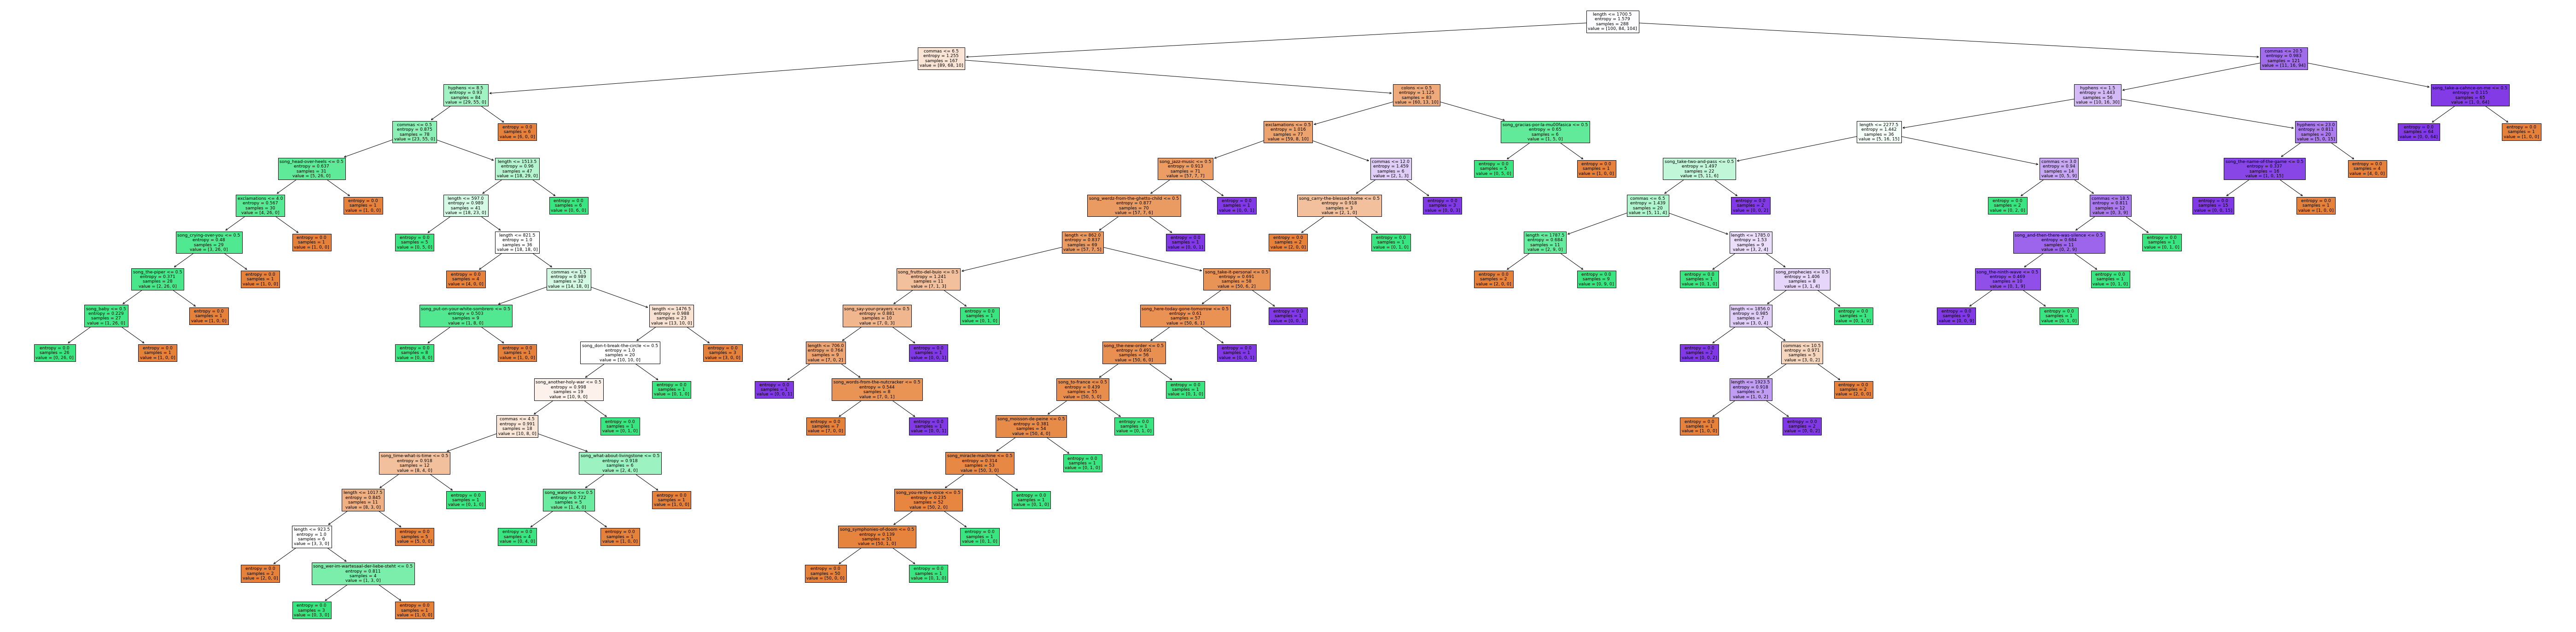

In [71]:
plt.figure(figsize=(100, 25))
tree.plot_tree(clf, feature_names=X.columns, filled=True)
plt.show()

In [89]:
predictions = clf.predict(X_test)

In [78]:
predictions

array(['blind-guardian', 'abba', 'gangstarr', 'abba', 'blind-guardian',
       'blind-guardian', 'blind-guardian', 'abba', 'abba', 'gangstarr',
       'abba', 'blind-guardian', 'abba', 'blind-guardian', 'gangstarr',
       'abba', 'abba', 'abba', 'blind-guardian', 'blind-guardian',
       'blind-guardian', 'gangstarr', 'gangstarr', 'blind-guardian',
       'gangstarr', 'blind-guardian', 'blind-guardian', 'gangstarr',
       'abba', 'gangstarr', 'abba', 'blind-guardian', 'blind-guardian',
       'gangstarr', 'abba', 'abba', 'abba', 'gangstarr', 'gangstarr',
       'abba', 'blind-guardian', 'gangstarr', 'blind-guardian', 'abba',
       'gangstarr', 'abba', 'gangstarr', 'gangstarr', 'gangstarr',
       'blind-guardian', 'blind-guardian', 'blind-guardian', 'abba',
       'gangstarr', 'blind-guardian', 'blind-guardian', 'gangstarr',
       'abba', 'blind-guardian', 'abba', 'abba', 'abba', 'abba', 'abba',
       'abba', 'abba', 'gangstarr', 'gangstarr', 'abba', 'gangstarr',
       'blind-gua

In [90]:
precision_score(y_test, predictions, average='micro')

0.6388888888888888